In [1]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline

import gensim

In [8]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [9]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train['clean_text'])]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test['clean_text'])]

In [10]:
tagged_docs_train[:10]

[TaggedDocument(words="['ok', 'u', 'can', 'take', 'me', 'shop', 'when', 'u', 'get', 'paid', 'd']", tags=[0]),
 TaggedDocument(words="['tomorrow', 'i', 'am', 'not', 'go', 'to', 'theatr', 'so', 'i', 'can', 'come', 'wherev', 'u', 'call', 'me', 'tell', 'me', 'where', 'and', 'when', 'to', 'come', 'tomorrow']", tags=[1]),
 TaggedDocument(words="['jason', 'say', 'it', 'cool', 'if', 'we', 'pick', 'some', 'up', 'from', 'hi', 'place', 'in', 'like', 'an', 'hour']", tags=[2]),
 TaggedDocument(words="['i', 'wud', 'never', 'mind', 'if', 'u', 'dont', 'miss', 'me', 'or', 'if', 'u', 'dont', 'need', 'me', 'but', 'u', 'wil', 'realli', 'hurt', 'me', 'wen', 'u', 'need', 'me', 'amp', 'u', 'dont', 'tell', 'me', 'take', 'care']", tags=[3]),
 TaggedDocument(words="['smile', 'in', 'pleasur', 'smile', 'in', 'pain', 'smile', 'when', 'troubl', 'pour', 'like', 'rain', 'smile', 'when', 'sum1', 'hurt', 'u', 'smile', 'becoz', 'someon', 'still', 'love', 'to', 'see', 'u', 'smile']", tags=[4]),
 TaggedDocument(words="['y

In [11]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [12]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]   

In [13]:
# Fit a basic model, make predictions on the holdout test set, and the generate the evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

rf = RandomForestClassifier()
rf_model = rf.fit(train_vectors, y_train.values.ravel())

y_pred = rf_model.predict(test_vectors)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.678 / Recall: 0.282 / Accuracy: 0.891


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 88.88%


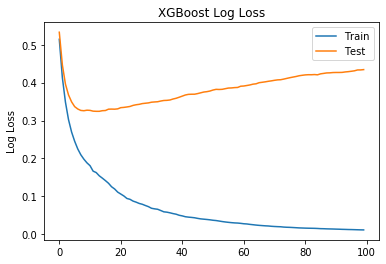

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

model = XGBClassifier()
eval_set = [(np.array(train_vectors), y_train.values.ravel()), (np.array(test_vectors), y_test)]
model.fit(np.array(train_vectors), y_train.values.ravel(), eval_metric=["error", "logloss"], eval_set=eval_set, verbose= 0)

predictions = model.predict(np.array(test_vectors))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [19]:
XbgCls_1 = XGBClassifier()
model_1 = XbgCls_1.fit(np.array(train_vectors), y_train.values.ravel())
ypred = model_1.predict(np.array(test_vectors))
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)
accuracy = accuracy_score(y_test,ypred)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

Precision: 0.625, Recall: 0.31690140845070425, Accuracy: 0.8887892376681614
